In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('waste-levels1.csv')
data

,rank,country,waste_generated,annual_percapita_kg1,recycling,annual_percapita_kg2,incineration,annual_percapita_kg3,landfill,annual_percapita_kg4,open_dump,annual_percapita_kg5,Unnamed: 12,unaccounted waste,final_score
0,1,Turkey,1.11,425,0.00,0,0.00,0,1.49,216,10.00,176,0.59,4,0.00
1,2,Latvia,1.25,438,1.69,93,0.00,0,1.72,250,0.00,0,10.00,68,11.63
2,3,New Zealand,4.17,727,0.00,0,0.00,0,5.00,727,0.00,0,0.00,0,24.37
3,4,Mexico,1.08,421,0.38,21,0.00,0,2.16,314,5.03,89,0.00,0,32.15
4,5,Chile,0.73,387,0.03,1,0.00,1,2.27,330,1.86,33,3.04,21,32.19
5,6,Italy,1.76,489,2.31,127,0.37,92,0.89,129,0.00,0,7.89,54,32.28
6,7,Estonia,0.45,360,1.62,89,0.74,185,0.18,27,0.00,0,6.83,46,48.98
7,8,Canada,3.96,706,2.65,145,0.08,21,3.51,511,0.00,0,0.00,0,51.19
8,9,Slovak Republic,0.64,378,0.52,29,0.14,35,1.55,226,0.00,0,2.74,19,54.10
9,10,Israel,3.34,644,2.93,161,0.00,0,3.33,483,0.00,0,0.00,0,57.35


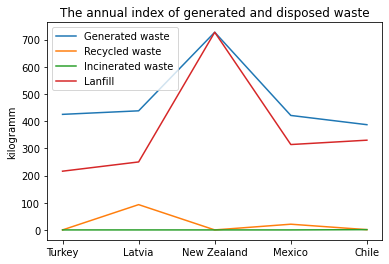

In [48]:
short_data = data.head(5)

countries = short_data['country']
waste = short_data['annual_percapita_kg1']
recycling = short_data['annual_percapita_kg2']
incineration =short_data['annual_percapita_kg3']
landfill = short_data['annual_percapita_kg4']
plt.plot(countries, waste, label = 'Generated waste')
plt.plot(recycling, label = 'Recycled waste')
plt.plot(incineration, label = 'Incinerated waste')
plt.plot(landfill, label = 'Lanfill')
plt.legend()
plt.ylabel('kilogramm')

plt.title('The annual index of generated and disposed waste')
plt.show()

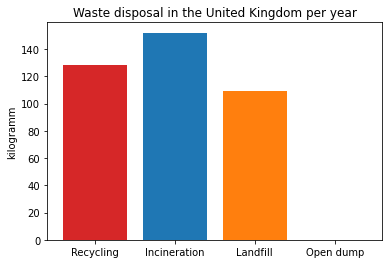

In [49]:
fig, ax = plt.subplots()

uk=data.groupby(["country"]).get_group("United Kingdom")
uk
uk_recycling =uk['annual_percapita_kg2']
uk_recycling
uk_incineration =uk['annual_percapita_kg3']
uk_incineration
uk_landfill = uk['annual_percapita_kg4']
uk_landfill
uk_opendump = uk['annual_percapita_kg5']
uk_opendump
waste_management = ['Recycling', 'Incineration', 'Landfill', 'Open dump']
counts = [int(uk_recycling), int(uk_incineration), int(uk_landfill), int(uk_opendump)]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:orange']

ax.bar(waste_management, counts, color=bar_colors)

ax.set_ylabel('kilogramm')
ax.set_title('Waste disposal in the United Kingdom per year')

plt.show()

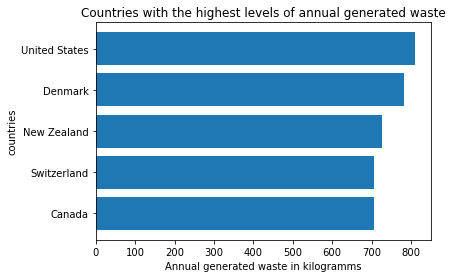

In [8]:
fig, ax = plt.subplots()

data_sorted= data.sort_values(by=['annual_percapita_kg1'],ascending=False)
new_data= data_sorted.head(5)
waste = new_data['annual_percapita_kg1']

countries = ['United States', 'Denmark', 'New Zealand', 'Switzerland', 'Canada']
ax.invert_yaxis()
ax.barh(countries,waste)

ax.set_ylabel('countries')
ax.set_xlabel('Annual generated waste in kilogramms')
ax.set_title('Countries with the highest levels of annual generated waste')

plt.show()


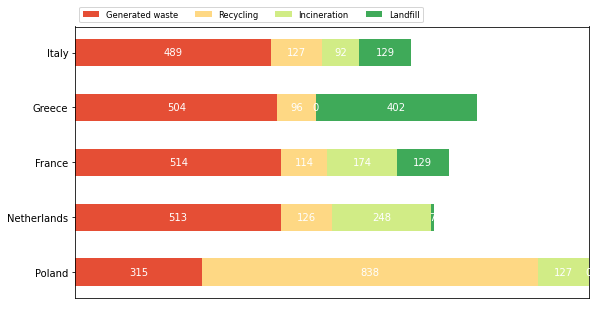

In [23]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Generated waste','Recycling', 'Incineration', 'Landfill']
countries = {
    'Italy': [489,127,92,129],
    'Greece': [504,96,0,402],
    'France': [514,114,174,129],
    'Netherlands': [513, 126, 248,7],
    'Poland': [315,838,127,0]
}


def survey(countries, category_names):
    
    labels = list(countries.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [50]:
import plotly.express as px
waste = ['Generated waste', 'Landfill','Recycling','Incineration' ]
df_mtl = pd.DataFrame(dict(number=[706,511,145,21], waste= waste))
df_mtl['country'] = 'Canada'
df_toronto = pd.DataFrame(dict(number=[421,314,21,0], waste=waste))
df_toronto['country'] = 'Mexico'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='waste', color='country')
fig.show()

In [65]:
import plotly.express as px
data_sorted= data.sort_values(by=['annual_percapita_kg1'],ascending=False)
fig = px.funnel_area(names=["South Korea","Germany", "Czech Republic", "Israel", "Latvia"],
                    values=[100, 87.32, 82.22, 57.35, 11.63])
fig.show()